# Advanced Automation 2025/26 - Assignment 1

To be delivered until 2025-12-19 23:59:59.

**Submission Notes**:
- Create a folder in your group's GitHub repository to solve this assignment. Copy this notebook into that folder.
- You should commit regularly to your repository the answers to the questions in this notebook. If you do not, your grade will be penalized by 1/20 points.
- After running the entire notebook (including graphs and outputs), save the notebook as a .pdf file, by going to File - Print - Destination: Save as PDF.
- Create a .zip file containing both the .ipynb file (the notebook itself) and the .pdf and submit it in Fénix.

# Part 1 - Arduino

1. Set up a series of connections in order to extract sensor data with the Arduino. First make the connections as shown below. **Mind the direction of the temperature sensor. If you have an incorrect position, you will be connection the power to the ground and vice-versa and you will damage the sensor.** The photoresistor sensor on the other hand has no polarity.

<img src="arduino_sensor_schematic.png" width=1000/>

**1.1.** Code an Arduino sketch, where the value of temperature and luminance are printed to the serial monitor. For each serial print that you make, print the value of temperature, then a semicolon, then the value of luminance with a new line (use no whitespaces). You can do this by using three separate `Serial.print`, with the last one being a `Serial.println`. Print values 5 times per second (use the delay function to control this). Manually influence the readings of the sensors, by covering the photoresistor or shining light on it, and by lightly and carefully touching the temperature sensor to increase its temperature readings. Copy and paste your arduino code below. You may use a python code cell, even though the code can not be run.



*Hint: for the temperature value to be in Celsius, divide the read value by 1024 and multiply it by 500. The luminance does not have to be converted. Note that the temperature sensor appears not to be very reliable. Since the objective of this exercise is just to plot the results, this should not be an issue.*

In [ ]:
// Define analog pins for sensors
const int tempSensorPin = A0; // Temperature sensor connected to Analog Pin A0
const int lightSensorPin = A1; // Photoresistor connected to Analog Pin A1

void setup() {
  // Initialize serial communication at 9600 bits per second:
  Serial.begin(9600);
}

void loop() {
  // Read the analog value from the temperature sensor
  int tempRawValue = analogRead(tempSensorPin);
  
  // Convert the raw temperature value to Celsius
  // Hint: for the temperature value to be in Celsius, divide the read value by 1024 and multiply it by 500.
  float temperatureC = (tempRawValue / 1024.0) * 500.0;
  
  // Read the analog value from the photoresistor
  int luminanceValue = analogRead(lightSensorPin);
  
  // Print temperature, then a semicolon, then luminance with a new line
  // No whitespaces as requested
  Serial.print(temperatureC);
  Serial.print(";");
  Serial.println(luminanceValue);
  
  // Delay for 200 milliseconds to print values 5 times per second (1000ms / 5 = 200ms)
  delay(200);
}

To import the data into Arduino, keep it running (the Serial Monitor must be closed in Arduino) and run the following code. Change the COM port to your own. This block of code will read 500 values from the Serial. Given that each observation is taken every 0.2 seconds, it should take a minute and a half.

In [1]:
import serial
import time

ser = serial.Serial('COM3', 9600, timeout=1)
time.sleep(2)

data = []
for i in range(500):
    line = ser.readline()
    if line:
        string = line.decode()
        data.append(string)

ser.close()

**1.2.** Convert the data into a pandas dataframe and save it in a `.csv` file. In addition to the temperature and luminance values, also include the elapsed time, considering the first observation at $t=0$ and every observation 0.2 seconds after the previous one. Add the `.csv` file to your submission in Fenix and upload it to your GitHub repository.

In [2]:
import pandas as pd

# Initialize lists to store temperature and luminance
temperatures = []
luminances = []

# Parse the collected data
for entry in data:
    try:
        # Split the string by semicolon
        temp_str, lum_str = entry.strip().split(';')
        temperatures.append(float(temp_str))
        luminances.append(int(lum_str))
    except ValueError as e:
        print(f"Could not parse line: {entry.strip()} - Error: {e}")
        continue

# Create a pandas DataFrame
df = pd.DataFrame({
    'temperature_celsius': temperatures,
    'luminance': luminances
})

# Calculate elapsed time (each observation is 0.2 seconds apart)
df['elapsed_time_seconds'] = df.index * 0.2

# Reorder columns for better readability (optional)
df = df[['elapsed_time_seconds', 'temperature_celsius', 'luminance']]

# Display the first few rows of the DataFrame
print(df.head())

# Save the DataFrame to a CSV file
csv_filename = 'sensor_data.csv'
df.to_csv(csv_filename, index=False)
print(f"Data successfully saved to {csv_filename}")

   elapsed_time_seconds  temperature_celsius  luminance
0                   0.0               273.44         85
1                   0.2               273.44         85
2                   0.4               273.44         86
3                   0.6               273.44         87
4                   0.8               273.44         87
Data successfully saved to sensor_data.csv


**1.3.** Plot the emperature against time, the luminance against time and the temperature against the luminosity. **(1.00)**

Data loaded successfully.


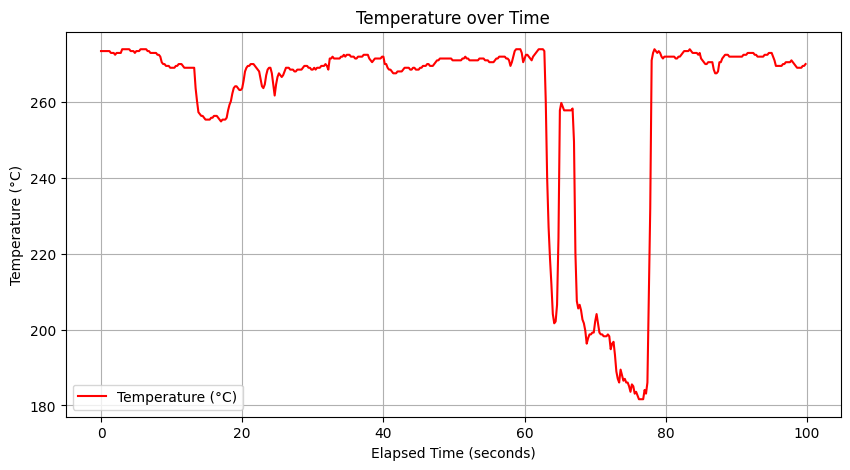

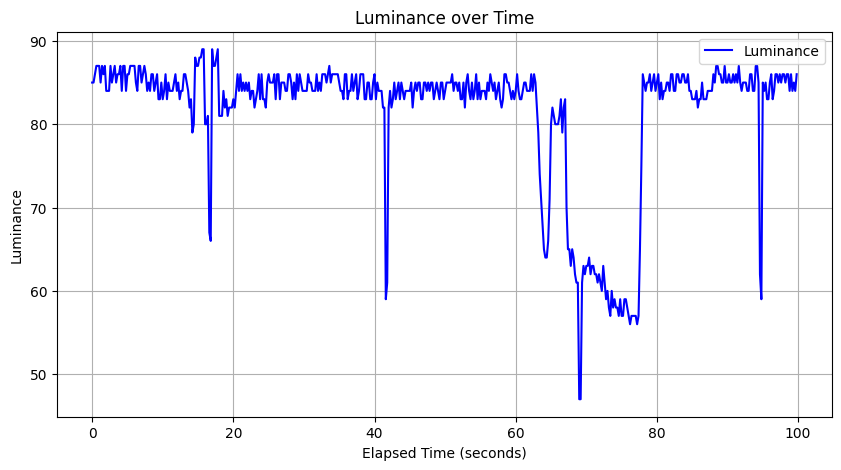

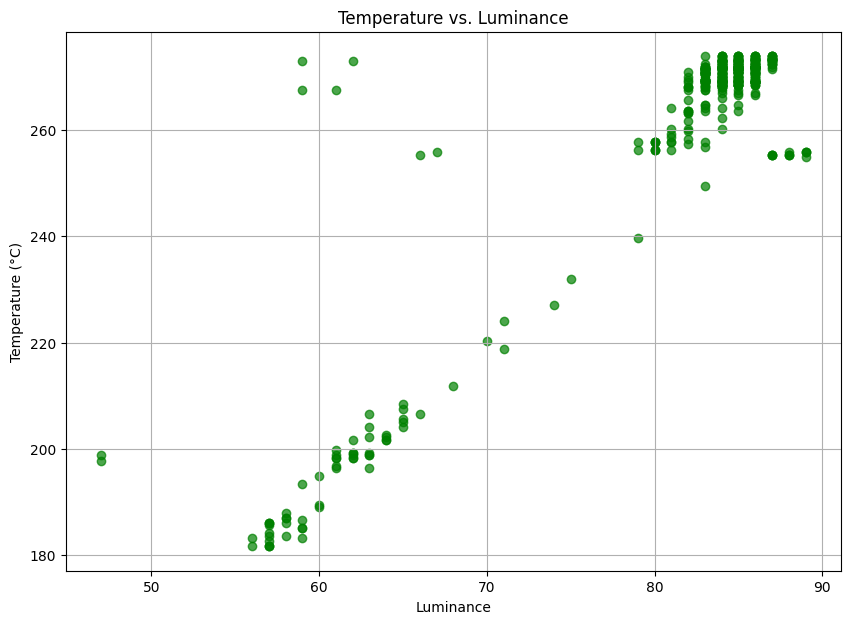

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
try:
    df = pd.read_csv('sensor_data.csv')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'sensor_data.csv' not found. Please ensure the previous step was executed and the file was created.")
    exit()

# --- Plot 1: Temperature against time ---
plt.figure(figsize=(10, 5))
plt.plot(df['elapsed_time_seconds'], df['temperature_celsius'], label='Temperature (°C)', color='red')
plt.title('Temperature over Time')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

# --- Plot 2: Luminance against time ---
plt.figure(figsize=(10, 5))
plt.plot(df['elapsed_time_seconds'], df['luminance'], label='Luminance', color='blue')
plt.title('Luminance over Time')
plt.xlabel('Elapsed Time (seconds)')
plt.ylabel('Luminance')
plt.grid(True)
plt.legend()
plt.show()

# --- Plot 3: Temperature against Luminance ---
plt.figure(figsize=(10, 7))
plt.scatter(df['luminance'], df['temperature_celsius'], alpha=0.7, color='green')
plt.title('Temperature vs. Luminance')
plt.xlabel('Luminance')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Part 2 - Databases

For this part of the assignment, you will use the mimic-iii database from the laboratory classes. Start by adding a few new tables to the database, using the SQL files included in the assignment's files. Open PGAdmin and connect to your mimic-iii database.

To properly load these tables, first run `demographic.sql` and then run `lab_firstday.sql`.


**2.1.** Open the connection to your mimic-iii database. **(0.50)**

If you want, you can delete your credentials before submitting the assignment, but if you do so, please run the notebook first, for the results to be displayed.

In [3]:
import pandas as pd
import numpy as np
import psycopg2 as psql
import matplotlib.pyplot as plt

conn = psql.connect(host='localhost',
                    database='mimic-iii',
                    user='username',
                    password='password',
                    port=5432)

#Create a cursor object using the cursor() method
cursor = conn.cursor()

#Execute a SQL function using the execute() method
cursor.execute("select version()")

# Fetch a single row using fetchone() method
data = cursor.fetchone()
print("Connection established to: ", data)

Connection established to:  ('PostgreSQL 18.1 on x86_64-windows, compiled by msvc-19.44.35219, 64-bit',)


**2.2.**
Create a function that receives an SQL query and automatically opens a cursor, queries the database, extracts the columns, creates a pandas database, and closes the connections.
**(0.50)**

In [4]:
import pandas as pd
import psycopg2

def query_to_dataframe(sql_query):
    """
    Executes an SQL query, fetches results, and returns a pandas DataFrame.
    Assumes a global 'conn' object for the database connection is available.
    """
    df = pd.DataFrame()
    # Ensure the global 'conn' object is available and active
    # The 'conn' object should be established in cell 2.1 (HUulVZm1IBH3)
    if 'conn' not in globals() or conn is None:
        print("Error: Database connection (conn) is not established or not globally available.")
        print("Please run cell 2.1 (HUulVZm1IBH3) to establish the connection.")
        return df

    try:
        # Create a cursor object
        cur = conn.cursor()

        # Execute the query
        cur.execute(sql_query)

        # Fetch all results
        rows = cur.fetchall()

        # Get column names from the cursor description
        colnames = [desc[0] for desc in cur.description]

        # Create a pandas DataFrame
        df = pd.DataFrame(rows, columns=colnames)

        # Close the cursor
        cur.close()

    except Exception as e:
        print(f"Error executing query or creating DataFrame: {e}")
        # Ensure cursor is closed even if an error occurs
        if 'cur' in locals() and cur:
            cur.close()

    return df

print("Function 'query_to_dataframe' defined for PostgreSQL.")

Function 'query_to_dataframe' defined for PostgreSQL.


**2.3.**
Query the table admissions filtering for admission type as elective and insurance as private.
**(1.00)**

In [5]:
sql_query_2_3 = """
SELECT *
FROM admissions
WHERE admission_type = 'ELECTIVE'
  AND insurance = 'Private';
"""

df_admissions_filtered = query_to_dataframe(sql_query_2_3)

print(f"Number of rows found: {len(df_admissions_filtered)}")
if not df_admissions_filtered.empty:
    print("First 5 rows of the filtered admissions data:")
    print(df_admissions_filtered.head())

Number of rows found: 3
First 5 rows of the filtered admissions data:
   row_id  subject_id  hadm_id           admittime           dischtime  \
0   12315       10065   183314 2189-09-08 07:15:00 2189-09-20 14:00:00   
1   40972       43798   130870 2198-06-29 07:15:00 2198-08-07 23:59:00   
2   41053       44083   125157 2112-05-04 08:00:00 2112-05-11 14:15:00   

  deathtime admission_type         admission_location discharge_location  \
0      None       ELECTIVE  PHYS REFERRAL/NORMAL DELI                SNF   
1      None       ELECTIVE  PHYS REFERRAL/NORMAL DELI   HOME HEALTH CARE   
2      None       ELECTIVE  PHYS REFERRAL/NORMAL DELI   HOME HEALTH CARE   

  insurance language  religion marital_status ethnicity edregtime edouttime  \
0   Private     ENGL  CATHOLIC         SINGLE     WHITE      None      None   
1   Private     ENGL  CATHOLIC        MARRIED     WHITE      None      None   
2   Private     ENGL  CATHOLIC         SINGLE     WHITE      None      None   

           

**2.4.**
Query the table admissions, filtering for the same conditions as the previous exercise (admission type as elective and insurance as private). Join the "drgcodes" table on the admission ID. Display only the columns regarding the subject id, admission id, time of death, and description of the drug.
**(1.00)**

In [6]:
sql_query_2_4 = """
SELECT
    ad.subject_id,
    ad.hadm_id,
    ad.deathtime,
    dr.description
FROM admissions ad
LEFT JOIN drgcodes dr
    ON ad.hadm_id = dr.hadm_id
WHERE ad.admission_type = 'ELECTIVE'
  AND ad.insurance = 'Private';
"""

df_admissions_drgcodes = query_to_dataframe(sql_query_2_4)

print(f"Number of rows found: {len(df_admissions_drgcodes)}")
if not df_admissions_drgcodes.empty:
    print("First 5 rows of the joined and filtered data:")
    print(df_admissions_drgcodes.head())

Number of rows found: 8
First 5 rows of the joined and filtered data:
   subject_id  hadm_id deathtime  \
0       10065   183314      None   
1       10065   183314      None   
2       43798   130870      None   
3       43798   130870      None   
4       43798   130870      None   

                                         description  
0    Major Stomach, Esophageal & Duodenal Procedures  
1  STOMACH, ESOPHAGEAL & DUODENAL PROC AGE >17 W ...  
2  Tracheostomy W Long Term Mechanical Ventilatio...  
3  Tracheostomy W Long Term Mechanical Ventilatio...  
4  TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NE...  


**2.5.**
Explain how relational databases and graph databases model data. What are the advantages and disadvantages of each approach?
**(1.50)**

As bases de dados relacionais organizam a informação em tabelas constituídas por colunas e linhas, sendo as relações estabelecidas através de chaves primárias e estrangeiras. A estrutura dos dados é definida antecipadamente por um esquema rígido. Um exemplo comum é a ligação entre as tabelas Clientes e Encomendas através do identificador do cliente.

As principais vantagens deste modelo incluem a garantia de integridade e consistência dos dados através das propriedades ACID e a utilização de uma linguagem padronizada (SQL). No entanto, apresentam desvantagens como a dificuldade de escalabilidade horizontal, a complexidade na alteração do esquema em sistemas em produção, a ineficiência na modelação de relações muito complexas devido ao uso intensivo de JOINs e a incompatibilidade com a programação orientada a objetos (object-relational impedance mismatch).

As bases de dados de grafos representam os dados através de nós, arestas e propriedades, permitindo modelar diretamente as relações entre entidades. Destacam-se pela eficiência em consultas que envolvem relações complexas e múltiplos níveis de ligação, bem como pela flexibilidade do esquema.

Entre as desvantagens das bases de dados de grafos encontram-se a curva de aprendizagem associada a novas linguagens de consulta, como o Cypher, e a menor eficiência em consultas analíticas baseadas em grandes agregações de dados pouco relacionados.

Em conclusão, a escolha entre bases de dados relacionais e de grafos depende da natureza dos dados e do tipo de consultas pretendidas: as bases de dados relacionais são mais adequadas para dados estruturados com forte integridade, enquanto as de grafos são preferíveis quando as relações entre os dados são o elemento central.

# Part 3 - Support Vector Machines

**3.1.**
Obtain the dataset for this problem, by running the SQL query below. After, close the connection to your SQL server.
**(0.50)**

In [10]:
query = "SELECT pivoted_lab.*," +\
                "gender as gender," +\
                "admission_age," +\
                "ethnicity_grouped as eth_grp," +\
                "hospital_expire_flag," +\
                "los_icu " +\
        "FROM demographics " +\
        "LEFT JOIN pivoted_lab " +\
        "ON demographics.icustay_id = pivoted_lab.icustay_id " +\
        "WHERE first_icu_stay = true"

df = query_to_dataframe(query)
print(df.head())
print(df.shape)
conn.close()

   subject_id  hadm_id  icustay_id  aniongap_min  aniongap_max  albumin_min  \
0       10006   142345      206504          12.0          20.0          2.7   
1       10011   105331      232110          12.0          12.0          2.6   
2       10013   165520      264446          13.0          13.0          NaN   
3       10017   199207      204881          13.0          13.0          2.8   
4       10019   177759      228977          20.0          46.0          3.2   

   albumin_max  bands_min  bands_max  bicarbonate_min  ...  sodium_max  \
0          3.4        NaN        NaN             29.0  ...       139.0   
1          2.6        2.0        2.0             23.0  ...       136.0   
2          NaN       13.0       13.0             29.0  ...       138.0   
3          2.8        NaN        NaN             29.0  ...       139.0   
4          3.2        NaN        NaN             10.0  ...       141.0   

   bun_min  bun_max  wbc_min  wbc_max  gender  admission_age  eth_grp  \
0      

**3.2.** Prepare your dataset:

* Drop the ID columns of subject, admission and ICU stay.
* Drop columns with at least one NA value.
* Encode the categorical column: `eth_grp` and `gender`. *Suggestion: use pd.get_dummies*
* Divide the dataset into features and response. The response variable is `hospital_expire_flag`.
* Split the dataset into training (80%) and test (20%) sets. *Suggestion: split the data so that the proportion of positive and negative examples is the same in both sets.*

**(1.00)**


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = df.drop(columns=['subject_id', 'hadm_id', 'icustay_id'])
df = df.dropna(axis=1, how='any')
df = pd.get_dummies(df, columns=['eth_grp', 'gender'], drop_first=True)

X = df.drop(columns=['hospital_expire_flag'])
y = df['hospital_expire_flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (102, 29) (102,)
Test set shape: (26, 29) (26,)


**3.3.**
Fit a Support Vector Machine (SVM) with a radial-basis function (RBF) kernel to the dataset. Set the hyperparameter cost $C=1$ and the hyperparameter gamma $\gamma=0.5$. Remember that SVMs are sensitive to the scale of the inputs.
**(1.00)**

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

svm_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1, gamma=0.5, random_state=42))
])

svm_rbf.fit(X_train, y_train)

train_acc = svm_rbf.score(X_train, y_train)
test_acc = svm_rbf.score(X_test, y_test)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)


Training Accuracy: 1.0
Test Accuracy: 0.6923076923076923


**3.4.**
Obtain the predictions for the model on the test set. Plot the receiver operating curve and calculate the AUC metric.
**(1.00)**

**3.5.** Consider the $\gamma$ hyperparameter of the radial-basis function kernel. How does changing the value of $\gamma$ affect the decision boundary of the SVM? And how does it affect the bias and variance of the model?
**(2.00)**

**3.6.**
Perform grid-search cross-validation on the SVM model, changing the values of $C$ and $\gamma$. Consider AUC as the performance measure. What are the best hyperparameters obtained?
**(2.00)**

**3.7.**
Compute the AUC on the test set for the best model obtained in question 3.6.
Plot the ROC curve for the test set and compute the AUC metric.
Compare the performance with the model from **3.3**.
**(1.00)**

# Part 4 - Tree-based Methods


**4.1.**
Explain how boosting works in tree-based methods. How does it differ from bagging? Does the technique aim to reduce bias or variance, and how?
**(1.50)**

**4.2.** Fit a Gradient Boosting Classifier to the same dataset as in Part 3. Tune the learning rate and the max depth of the trees. How does the model perform on the test set compared to the SVM model?
**(2.50)**